<a href="https://colab.research.google.com/github/labibazad191/IELTS_SEEKERS/blob/main/IELTSSEEKERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 Project Title: English Article Evaluation Technique: A Case of IELTS

🔬 Category: Natural Language Processing (NLP), Machine Learning

👤 Developed by: Labib Azad M240205009 (A teammate is no longer continuing this semester, this is my original solo project  )

🧠 Objective:

To design, develop, and fine-tune a machine learning-based system capable of predicting IELTS writing band scores with high accuracy—providing both numerical scores and qualitative feedback—based on the content of essay responses.

📚 Summary:

Grading IELTS writing tasks is a complex, time-consuming, and often subjective process. That's exactly what inspired me to take on this project.

In this work, I set out to build an intelligent evaluator—a digital examiner—that can assess IELTS Task 2 essays just like a human expert would. Leveraging both publicly available datasets from Kaggle and four carefully curated custom datasets I created myself (focusing on key IELTS criteria: Coherence & Cohesion, Grammatical Range & Accuracy, Lexical Resource, and Task Achievement), I developed a pipeline to train and evaluate a variety of machine learning models.

At the heart of the system lies a Support Vector Machine (SVM) architecture, which I trained for both classification (discrete band scores) and regression (continuous scoring).

Final Vision:
This project is more than just a score predictor. It's a proof-of-concept for the future of AI-assisted education.

In [ ]:
# Step 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve


from sklearn.feature_extraction.text import TfidfVectorizer

import joblib

In [ ]:
# Step 2: Load datasets
ielts_df = pd.read_csv('/content/ielts_writing_dataset.csv')
coherence_df = pd.read_csv('/content/Coherence_and_Cohesion.csv')
grammatical_range_df = pd.read_csv('/content/Grammatical_Range.csv')
lexical_resource_df = pd.read_csv('/content/Lexical_Resource.csv')






In [ ]:
# Step 3: Data Preprocessing and Feature Engineering
# For classification tasks, create a 'question' + 'answer' feature and encode the target variables

def preprocess_data(df, target_column):
    X = df['question'] + ' ' + df['answer']
    y = df[target_column]

    # If y is a classification target, apply LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    return X, y_encoded

# Example: For classification in "Coherence_and_Cohesion.csv" using 'Include_an_introduction_and_conclusion' column
X, y = preprocess_data(coherence_df, 'Include_an_introduction_and_conclusion')

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best parameters found: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf', 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.30      0.43        33
           1       0.59      0.89      0.71        37

    accuracy                           0.61        70
   macro avg       0.65      0.60      0.57        70
weighted avg       0.65      0.61      0.58        70



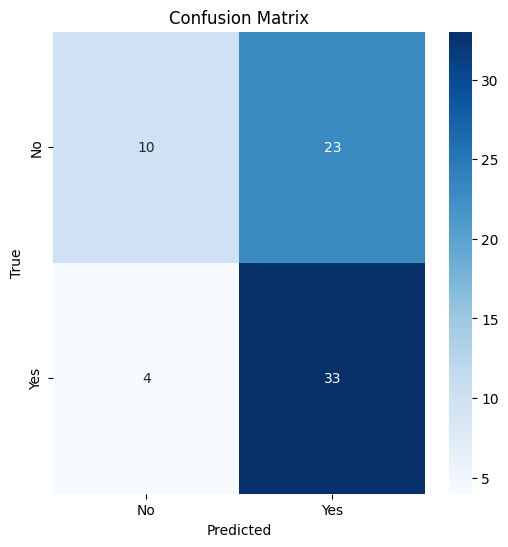

Accuracy: 0.6142857142857143


['svm_model_coherence_and_cohesion.pkl']

In [ ]:
# Step 4: Set up pipeline and grid search for classification model
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('svm', SVC())
])

param_grid = {
    'tfidf__max_features': [5000, 10000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['rbf'],
    'svm__gamma': [0.1, 1, 'auto']
}

# Step 5: Perform GridSearchCV
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Print Best Parameters and Predictions
print("Best parameters found:", grid_search.best_params_)

# Predictions and evaluation
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'svm_model_coherence_and_cohesion.pkl')

In [ ]:
# Make predictions on the test set
predictions = grid_search.predict(X_test)


In [ ]:
# 1. Predict
predictions = grid_search.predict(X_test)

In [ ]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('svm', SVC(probability=True))  # enables ROC later
])

# Train and predict
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)


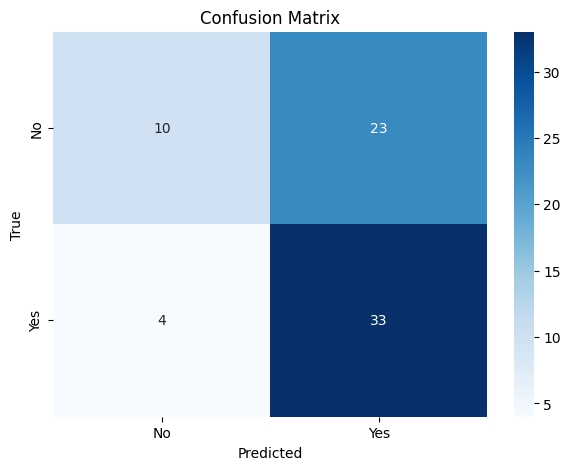

In [ ]:
# Make sure model is already trained with grid_search.fit()

# 1. Predict
predictions = grid_search.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Step 7: Repeat for other datasets (Grammatical Range, Lexical Resource, etc.)

# For "Grammatical Range" dataset
X, y = preprocess_data(grammatical_range_df, 'Use_a_variety_of_complex_and_simple_sentences')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
print("Classification Report for Grammatical Range:")
print(classification_report(y_test, y_pred))

# Visualizing results for Grammatical Range
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Grammatical Range:", accuracy)

# Save the Grammatical Range model
joblib.dump(grid_search.best_estimator_, 'svm_model_grammatical_range.pkl')


Classification Report for Grammatical Range:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Accuracy for Grammatical Range: 1.0


['svm_model_grammatical_range.pkl']

In [ ]:


# Step 8: For Regression Task (e.g., Lexical Resource Score prediction)
X, y = preprocess_data(lexical_resource_df, 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SVR for regression
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('svm', SVR())
])

param_grid = {
    'tfidf__max_features': [5000, 10000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 'auto'],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predictions and evaluation
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Lexical Resource:", mse)

# Save the Lexical Resource Regression model
joblib.dump(grid_search.best_estimator_, 'svm_model_lexical_resource.pkl')


Mean Squared Error for Lexical Resource: 0.34572508617977193


['svm_model_lexical_resource.pkl']

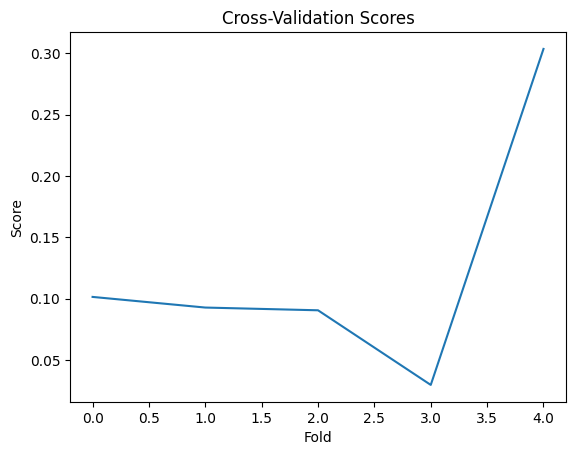

In [ ]:
# The rest of the code remains the same

# Step 9: Plotting Results (Cross-validation, Accuracy)
# For visualization of cross-validation results
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
plt.plot(cross_val_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Score')
plt.xlabel('Fold')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


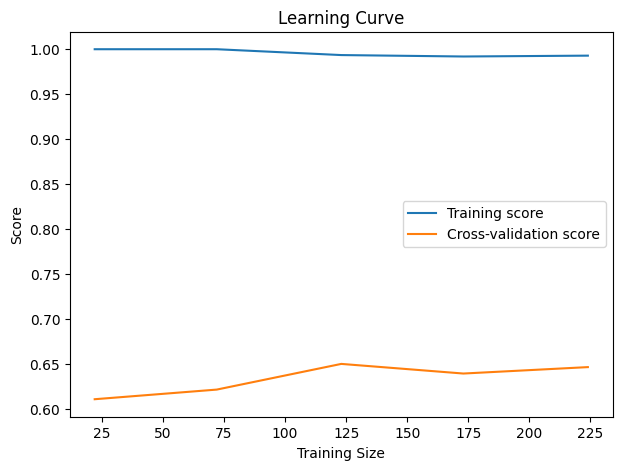

In [ ]:
# Step 10: Learning Curves
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=5)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
X_train_tfidf = grid_search.best_estimator_.named_steps['tfidf'].transform(X_train)


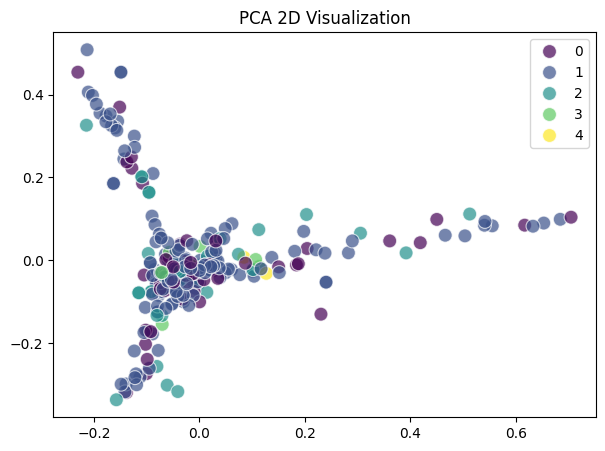

In [ ]:
# Step 11: PCA Plot (2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_tfidf)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='viridis', s=100, alpha=0.7)
plt.title('PCA 2D Visualization')
plt.show()

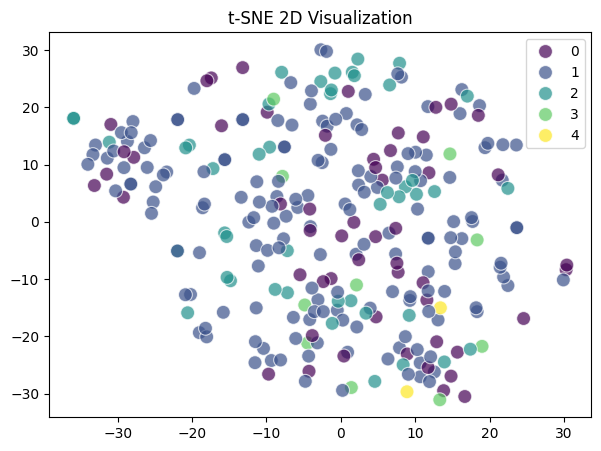

In [ ]:
# Step 12: t-SNE Visualization (2D)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_tfidf.toarray())

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette='viridis', s=100, alpha=0.7)
plt.title('t-SNE 2D Visualization')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


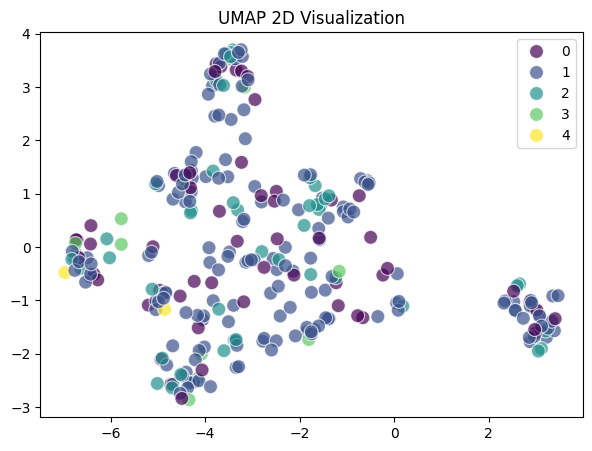

['best_tfidf_vectorizer.pkl']

In [ ]:

# Step 13: UMAP (Uniform Manifold Approximation and Projection)
import umap

umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X_train_tfidf.toarray())

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_train, palette='viridis', s=100, alpha=0.7)
plt.title('UMAP 2D Visualization')
plt.show()

# Step 14: Save the Best Model and Vectorizer
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'Use_a_variety_of_complex_and_simple_sentences.pkl')

# Optional: Save the vectorizer used in the pipeline
joblib.dump(grid_search.best_estimator_.named_steps['tfidf'], 'best_tfidf_vectorizer.pkl')

In [ ]:
final_report = pd.DataFrame({
    'Question_Answer': X_test,
    'Actual_Score': y_test,
    'Predicted_Score': y_pred,
    'Error': abs(y_test - y_pred)
})

# Optional: Round predicted scores
final_report['Predicted_Score_Rounded'] = final_report['Predicted_Score'].round(1)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n=== IELTS Band Score Prediction Summary ===")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

final_report.to_csv("IELTS_Band_Score_Prediction_Report.csv", index=False)
print("✅ Final report saved as 'IELTS_Band_Score_Prediction_Report.csv'")



=== IELTS Band Score Prediction Summary ===
Mean Absolute Error (MAE): 0.384
Mean Squared Error (MSE): 0.346
Root Mean Squared Error (RMSE): 0.588
R² Score: 0.325
✅ Final report saved as 'IELTS_Band_Score_Prediction_Report.csv'
